In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import scipy
import matplotlib
import seaborn as sns
from statistics import mean
import seaborn as sns
import matplotlib.pyplot as plt
import re

For the first assessment I decided to use a protein chemical properties dataset (I) since it can be used for classification without advanced data manipulation techniques thus becoming a baseline for the rest of the project. 

The second (II) dataset consists only of amino acid sequences and their total length called residue count. In order to work with it, either sequence analysis or feature engineering is required. Those will be presented in later notebooks. In order to work on the same proteins (IDs) since the beginning of the project, the subset of protein ID's and their classification are created in the "1_feature_engineering" notebook and are used them within this dataset.

In [3]:
proteins_data = pd.read_csv("./Data/pdb_data_no_dups.csv")

In [4]:
proteins_data

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141396,9RUB,LYASE(CARBON-CARBON),X-RAY DIFFRACTION,Protein,932,2.60,101838.68,NaN,NaN,2.38,48.29,NaN,NaN,1991.0
141397,9TNA,T-RNA,X-RAY DIFFRACTION,NaN,0,NaN,24244.34,NaN,NaN,3.17,61.18,NaN,NaN,1986.0
141398,9WGA,LECTIN (AGGLUTININ),X-RAY DIFFRACTION,Protein,342,1.80,34270.22,NaN,NaN,2.50,50.76,NaN,NaN,1990.0
141399,9XIA,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,388,1.90,43542.29,NaN,NaN,2.79,55.93,NaN,NaN,1989.0


In this step, the columns describing experiment conditions and publication year are removed since this data doesn't bring any added value towards better prediction. Then, the chemical properties and the classification data frame are joined.

In [5]:
selected_columns= ["structureId","resolution","structureMolecularWeight","crystallizationTempK","densityMatthews","densityPercentSol","phValue"]

In [6]:
proteins = pd.read_csv("Data/protein_classification.csv").drop(columns="Unnamed: 0")
proteins

,structureId,classification
0,101M,TRANSPORT PROTEIN
1,102L,HYDROLASE
2,102M,TRANSPORT PROTEIN
3,103L,HYDROLASE
4,103M,TRANSPORT PROTEIN
...,...,...
117508,9RNT,HYDROLASE
117509,9RSA,HYDROLASE
117510,9RUB,LYASE
117511,9XIA,ISOMERASE


In [7]:
df = proteins.merge(proteins_data[selected_columns].reset_index(), how="left", on="structureId")

In [8]:
df.drop(columns="index",inplace=True)

In [9]:
df

,structureId,classification,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue
0,101M,TRANSPORT PROTEIN,2.07,18112.80,NaN,3.09,60.20,9.0
1,102L,HYDROLASE,1.74,18926.61,NaN,2.75,55.28,NaN
2,102M,TRANSPORT PROTEIN,1.84,18010.64,NaN,3.09,60.20,9.0
3,103L,HYDROLASE,1.90,19092.72,NaN,2.70,54.46,NaN
4,103M,TRANSPORT PROTEIN,2.07,18093.78,NaN,3.09,60.30,9.0
...,...,...,...,...,...,...,...,...
117874,9RNT,HYDROLASE,1.50,11134.77,NaN,2.09,41.23,NaN
117875,9RSA,HYDROLASE,1.80,27987.16,NaN,2.25,45.45,NaN
117876,9RUB,LYASE,2.60,101838.68,NaN,2.38,48.29,NaN
117877,9XIA,ISOMERASE,1.90,43542.29,NaN,2.79,55.93,NaN


Next, the mean across groups is checked. Since the data within the groups could have different distributions or high standard deviation, this action might not paint the whole picture.

However, the mean (and the median) are different among the groups, which is a good sign.

In [27]:
mean_in_group = df.iloc[:,1:].groupby("classification").aggregate("mean").reset_index()
mean_in_group.sort_values("phValue")

,classification,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,proteins_encoded
20,PROTEIN FIBRIL,2.337043,1.288979e+05,294.857229,2.158571,33.848387,6.342857,32.0
15,MEMBRANE PROTEIN,2.595058,9.268590e+04,290.307511,3.123835,56.765843,6.543793,13.0
11,IMMUNE SYSTEM,2.393055,8.347328e+04,291.926574,2.748955,53.270463,6.633087,6.0
10,HYDROLASE,2.055239,8.245114e+04,291.170905,2.583808,50.179624,6.661798,0.0
24,STRUCTURAL GENOMICS,2.033609,4.596022e+04,290.936617,2.534281,49.171602,6.678277,11.0
30,TRANSPORT PROTEIN,2.382974,8.673273e+04,291.039432,2.738693,51.741076,6.691192,4.0
0,APOPTOSIS,2.431929,7.091086e+04,290.810957,2.610416,50.201369,6.706932,23.0
21,RECEPTOR,2.298188,4.634131e+04,291.634407,2.710733,51.891810,6.730088,21.0
25,STRUCTURAL PROTEIN,2.795279,9.871754e+04,291.007108,2.680504,50.853041,6.732808,16.0
7,CYTOKINE,2.350732,5.141820e+04,294.025495,2.839371,53.611189,6.737435,27.0


Missing values in the dataset were filled with the mean of the group. 

In [11]:
df["phValue"].isna().sum()

np.int64(27844)

In [12]:
for column in df.columns[2:]:
    df[column] = df[column].fillna(df.groupby('classification')[column].transform('mean'))

In [13]:
df

,structureId,classification,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue
0,101M,TRANSPORT PROTEIN,2.07,18112.80,291.039432,3.09,60.20,9.000000
1,102L,HYDROLASE,1.74,18926.61,291.170905,2.75,55.28,6.661798
2,102M,TRANSPORT PROTEIN,1.84,18010.64,291.039432,3.09,60.20,9.000000
3,103L,HYDROLASE,1.90,19092.72,291.170905,2.70,54.46,6.661798
4,103M,TRANSPORT PROTEIN,2.07,18093.78,291.039432,3.09,60.30,9.000000
...,...,...,...,...,...,...,...,...
117874,9RNT,HYDROLASE,1.50,11134.77,291.170905,2.09,41.23,6.661798
117875,9RSA,HYDROLASE,1.80,27987.16,291.170905,2.25,45.45,6.661798
117876,9RUB,LYASE,2.60,101838.68,290.888641,2.38,48.29,7.082533
117877,9XIA,ISOMERASE,1.90,43542.29,291.378790,2.79,55.93,6.840079


In [14]:
proteins_dict = dict(zip(list(df["classification"].value_counts().index), range(len(df["classification"].value_counts().index.tolist()))))
df["proteins_encoded"] = df["classification"].map(proteins_dict)

For the base model, Random Forest is picked, since it often achieves high results in classification problems.

Random forest can handle nonlinear dependencies between variables, and because it is a tree-based algorithm it doesn't require scaling of the x variables, which simplifies the process.

In [15]:
from sklearn.ensemble import RandomForestClassifier

df_size = len(df)
train_size = int(len(df)*0.7)

proteins_cleaned_cleaned = df.sample(frac=1)

train = proteins_cleaned_cleaned[:train_size]
test = proteins_cleaned_cleaned[train_size:]

# X_train = train.drop(columns=['structureId','chainId','sequence','classification',"proteins_encoded"])
X_train = train[["resolution","structureMolecularWeight","crystallizationTempK","densityMatthews","densityPercentSol","phValue"]]
y_train = train["proteins_encoded"]

# X_test = test.drop(columns=['structureId','chainId','sequence','classification',"proteins_encoded"])
X_test = test[["resolution","structureMolecularWeight","crystallizationTempK","densityMatthews","densityPercentSol","phValue"]]
y_test = test["proteins_encoded"]

In [16]:
weights_dict = dict(zip(
                         range(len(train["classification"].value_counts().index.tolist())), 
                         train["classification"].value_counts().values.tolist()))

In [17]:
dict_weights = dict()

count_val = len(X_train)
for key, value in weights_dict.items():
    weight = 1-(value/count_val)
    dict_weights.update({key:weight})

In [18]:
model = RandomForestClassifier(class_weight=dict_weights)
model.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.7811791795431133,
                                     1: 0.8386232806156456,
                                     2: 0.8847482275949827,
                                     3: 0.9177725262073563,
                                     4: 0.9387020541719687,
                                     5: 0.9587226564866994,
                                     6: 0.9631339756407926,
                                     7: 0.9670726534569473,
                                     8: 0.9714354965763801,
                                     9: 0.9755801975398413,
                                     10: 0.9768284554323456,
                                     11: 0.9777858571168878,
                                     12: 0.979530994364661,
                                     13: 0.9837362903714476,
                                     14: 0.9876870871962673,
                                     15: 0.9878082772829182,
                                     16: 0.9882445615948615,
                                     17: 0.9888262740107859,
                                     18: 0.9893837484093801,
                                     19: 0.992825546870266,
                                     20: 0.9932375931648791,
                                     21: 0.9935284493728413,
                                     22: 0.9952008725686239,
                                     23: 0.9953705386899352,
                                     24: 0.9957341089498879,
                                     25: 0.996012846149185,
                                     26: 0.9964370114524632,
                                     27: 0.9965582015391141,
                                     28: 0.9968005817124159,
                                     29: 0.9974307701630006, ...})

In [19]:
y_pred = model.predict(X_test)

So far, the baseline results look promising, in general the result was higher when missing values were replaced by mean, comparing to replacing them with -1.

The plot shows that in many cases, less frequent groups are falsely identified as majority groups, despite using weights during training. The explanation is that there is more data describing these groups in the dataset, giving the model more information to learn from.

A group with the highest accuracy are virus proteins and protein fibrils that are easy to explain because both of these groups have some very typical features (virus - biggest molecular weight, protein fibrils - lowest pH) 

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred, average='macro')}")
print(f"precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"recall: {recall_score(y_test, y_pred, average='macro')}")

accuracy: 0.6271914941748671
F1: 0.6048434173582016
precision: 0.7491800459488915
recall: 0.5246033693625879


In [21]:
names = list(df["classification"].value_counts().index)

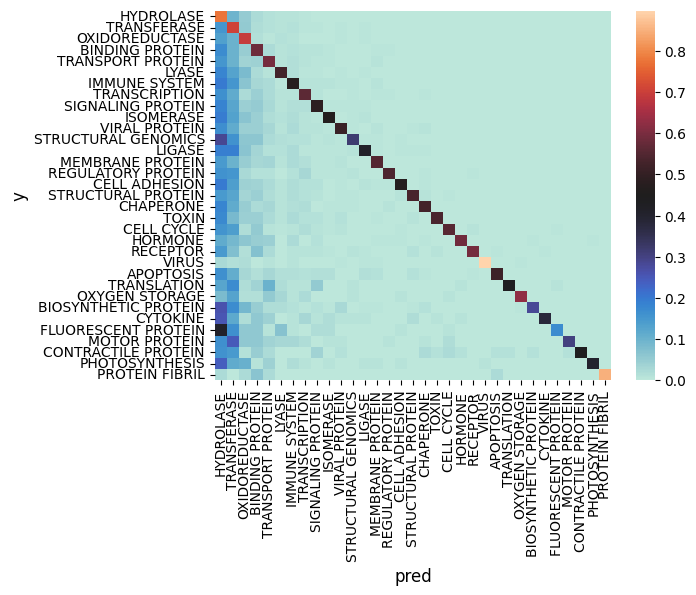

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn,  cmap='icefire', xticklabels=names, yticklabels=names)
plt.ylabel('y',fontsize=12)
plt.xlabel('pred',fontsize=12)
plt.show()